In [169]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split,learning_curve,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import confusion_matrix

In [170]:
from  google.colab import drive
drive.mount('/content/drive/', force_remount=True)
PATH='drive/MyDrive/enpm808w-datasets/quiz_bowl_data/'

Mounted at /content/drive/


In [171]:
train_df=pd.read_csv(PATH + 'qb.train.csv')
train_df.head()

,row,body_score,page,answer,text,category,tournaments,answer_type,corr,inlinks
0,1,127.398036,Comus (John Milton),Comus (John Milton),First performed in Ludlow Castle by the childr...,Literature,2000 ACF Nationals,work,True,62
1,2,50.212336,Circe,Comus (John Milton),First performed in Ludlow Castle by the childr...,Literature,2000 ACF Nationals,None,False,5
2,3,44.767071,Satyr,Comus (John Milton),First performed in Ludlow Castle by the childr...,Literature,2000 ACF Nationals,None,False,6
3,4,44.058274,Philip K. Dick,Wilfred Owen,This author is convinced by another to publish...,Literature,2009 ACF Winter,people,False,22
4,5,40.675249,Honore de Balzac,Wilfred Owen,This author is convinced by another to publish...,Literature,2009 ACF Winter,None,False,0


In [172]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8079 entries, 0 to 8078
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   row          8079 non-null   int64  
 1   body_score   8079 non-null   float64
 2   page         8079 non-null   object 
 3   answer       8079 non-null   object 
 4   text         8079 non-null   object 
 5   category     8079 non-null   object 
 6   tournaments  8079 non-null   object 
 7   answer_type  8079 non-null   object 
 8   corr         8079 non-null   bool   
 9   inlinks      8079 non-null   int64  
dtypes: bool(1), float64(1), int64(2), object(6)
memory usage: 576.1+ KB


In [173]:
test_df=pd.read_csv(PATH + 'qb.test.csv')
test_df.head(20)

,row,body_score,page,text,category,tournaments,answer_type,inlinks
0,31,40.023617,Death in Venice,The protagonist of this novella is inspired to...,Literature,2001 ACF Fall,work,4
1,32,27.538799,The Eye of the World,The protagonist of this novella is inspired to...,Literature,2001 ACF Fall,work,1
2,33,26.976121,Carmilla,The protagonist of this novella is inspired to...,Literature,2001 ACF Fall,work,2
3,88,45.848831,A Passage to India,In a symbolic incident in this novel Ronny Hea...,Literature,2001 ACF Regionals,work,5
4,91,99.811169,The Cherry Orchard,"We first meet Fiers, the aging footman, in Act...",Literature,2001 ACF Regionals,work,11
5,139,57.336446,Comic fantasy,"In a role as this mans daughter, Keira Knightl...",Literature,2008 Zot Bowl I,None,8
6,140,36.353865,Andromeda (mythology),"In a role as this mans daughter, Keira Knightl...",Literature,2008 Zot Bowl I,None,147
7,141,34.711254,Daisy Duck,"In a role as this mans daughter, Keira Knightl...",Literature,2008 Zot Bowl I,char,13
8,142,25.126434,Robin Hood,"In a role as this mans daughter, Keira Knightl...",Literature,2008 Zot Bowl I,people,47
9,188,157.981108,Athos (fictional character),"In one book in which he appears, a commissary ...",Literature,2008 Cardinal Classic XVII,people,83


In [174]:
test_df.shape

(887, 8)

In [175]:
guess_df=pd.read_csv(PATH + 'qb.guess.csv')
guess_df.head()

,row,corr
0,31,False
1,32,False
2,33,False
3,88,False
4,91,True


In [176]:
guess_df.shape

(887, 2)

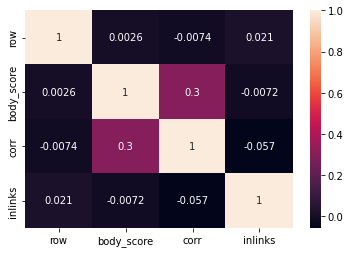

In [177]:
sns.heatmap(train_df.corr(),annot=True)

**TASK 2**

**Cleaning the Training Data. the columns row, page,text,category would be dropped since they all have almost the same values. so they wont be needed.
As for tournament noticed that they each have a year attached to each tournament name. i'd like to extract the year and call it the tournament's year. the answertype, tournament(year), and the corr columns are categorical values. i'll use the get dummies function for that.**

In [178]:
train_df['tournaments_year'] = train_df['tournaments'].str[:4].astype(int)
train_df = pd.get_dummies(train_df, columns=['answer_type'])
train_df=pd.get_dummies(train_df, columns=['tournaments_year'])
train_df.drop(['row','page','answer','text','category','tournaments'],axis=1,inplace=True)
train_df['corr']=train_df['corr'].map({True:1,False:0})
train_df

,body_score,corr,inlinks,answer_type_None,answer_type_abs,answer_type_anim,answer_type_char,answer_type_event,answer_type_org,answer_type_people,...,tournaments_year_2001,tournaments_year_2002,tournaments_year_2003,tournaments_year_2004,tournaments_year_2005,tournaments_year_2006,tournaments_year_2007,tournaments_year_2008,tournaments_year_2009,tournaments_year_2010
0,127.398036,1,62,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,50.212336,0,5,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,44.767071,0,6,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,44.058274,0,22,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,40.675249,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8074,51.072087,0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8075,42.298305,0,18,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8076,40.570231,0,8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8077,37.679422,0,9,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [179]:
train_df.shape

(8079, 24)

to predict whether the guesses are correct or not. using the corr columns as a determninant

In [180]:
X=train_df.drop(['corr'],axis=1)
Y=train_df['corr']
x_train, x_test, y_train, y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [181]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(6463, 23)
(1616, 23)
(6463,)
(1616,)


In [182]:
from sklearn.preprocessing import StandardScaler
ss_train = StandardScaler()
x_train = ss_train.fit_transform(x_train)

ss_test = StandardScaler()
x_test = ss_test.fit_transform(x_test)

**this is used to normalize the numerical variable of the data... that is the body_score and inlinks**

**2A.**

**Using Classification models: the logistic regression, SVM (multiple kernels), and decision trees for model training**

**Logistic Regression Training Model**

In [183]:
lr=LogisticRegression(solver='lbfgs', max_iter=1000)
lr.fit(x_train,y_train)
# in sample
# lr_score=lr.score(x_train,y_train)
# lr_predictions=lr.predict(x_train)

# out sample
lr_score=lr.score(x_test,y_test)
# lr_score=cross_val_score(lr, x_test,y_test, cv=5,scoring='accuracy').mean()
lr_predictions=lr.predict(x_test)
lr_score=round(lr_score,3)
print('The accuracy of the Logistic Regression model is:', lr_score)

The accuracy of the Logistic Regression model is: 0.655


<!-- **the cross validation score was used to choose out of a random selected values which is the best accuracy prediction by taking the mean of 5 selected values from the data** -->

In [184]:
cm = confusion_matrix(lr_predictions, y_test)
print(cm)

[[662 291]
 [267 396]]


**SVM Training Model**

In [185]:
svm=LinearSVC(max_iter=10000)
svm.fit(x_train,y_train)
svm_score=svm.score(x_test,y_test)
# svm_score=cross_val_score(svm, x_test,y_test, cv=5,scoring='accuracy').mean()
svm_score=round(svm_score,3)
print('The accuracy of the SVM model is: ', svm_score)

The accuracy of the SVM model is:  0.663


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [186]:
svm_predictions=svm.predict(x_test)

In [187]:
cm = confusion_matrix(svm_predictions, y_test)
print(cm)

[[717 332]
 [212 355]]


**Decision Tree Training Model**

In [188]:
dt=DecisionTreeClassifier(max_depth=3,random_state=0)
dt.fit(x_train,y_train)
dt_score=dt.score(x_test,y_test)
# dt_score=cross_val_score(dt, x_test,y_test, cv=5,scoring='accuracy').mean()
dt_score=round(dt_score,3)
print('The accuracy of the SVM model is: ', dt_score)

The accuracy of the SVM model is:  0.778


In [189]:
dt_predictions=dt.predict(x_test)

In [190]:
cm = confusion_matrix(dt_predictions, y_test)
print(cm)

[[889 319]
 [ 40 368]]


**Creating a table with each accuracy for the medthods**

In [191]:
accuracy_of_model={
    "Logistic Regression": lr_score,
    "SVM": svm_score,
    "Decision Tree": dt_score
}
a_df = pd.DataFrame([accuracy_of_model])
a_df

,Logistic Regression,SVM,Decision Tree
0,0.655,0.663,0.778


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


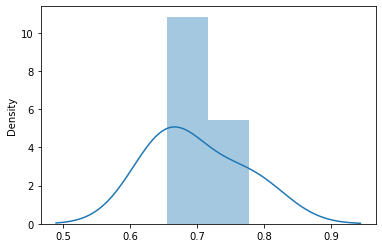

In [192]:
sns.distplot(a_df)

**B**

 **Look at where you’re making mistakes. Can you see any patterns?**


 Looking at the train data again, since i've used the 'tournaments' and 'answertype' to check for the accuracy for each method. i want to make use of the other categorical values. just to see how much improvement on accuracy i can get.


In [193]:
train_df_new=pd.read_csv(PATH+'qb.train.csv')
train_df_new

,row,body_score,page,answer,text,category,tournaments,answer_type,corr,inlinks
0,1,127.398036,Comus (John Milton),Comus (John Milton),First performed in Ludlow Castle by the childr...,Literature,2000 ACF Nationals,work,True,62
1,2,50.212336,Circe,Comus (John Milton),First performed in Ludlow Castle by the childr...,Literature,2000 ACF Nationals,None,False,5
2,3,44.767071,Satyr,Comus (John Milton),First performed in Ludlow Castle by the childr...,Literature,2000 ACF Nationals,None,False,6
3,4,44.058274,Philip K. Dick,Wilfred Owen,This author is convinced by another to publish...,Literature,2009 ACF Winter,people,False,22
4,5,40.675249,Honore de Balzac,Wilfred Owen,This author is convinced by another to publish...,Literature,2009 ACF Winter,None,False,0
...,...,...,...,...,...,...,...,...,...,...
8074,13920,51.072087,Lord Peter Wimsey,Snow Country,The author of this work later released a short...,Literature,2009 Buzzerfest,work,False,3
8075,13921,42.298305,Satires (Juvenal),Kaddish (poem),The subject of this poem finds refuge from Tro...,Literature,2009 Buzzerfest,None,False,18
8076,13922,40.570231,Kubla Khan,Kaddish (poem),The subject of this poem finds refuge from Tro...,Literature,2009 Buzzerfest,None,False,8
8077,13923,37.679422,Asgard,Kaddish (poem),The subject of this poem finds refuge from Tro...,Literature,2009 Buzzerfest,abs,False,9


In [194]:
train_df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8079 entries, 0 to 8078
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   row          8079 non-null   int64  
 1   body_score   8079 non-null   float64
 2   page         8079 non-null   object 
 3   answer       8079 non-null   object 
 4   text         8079 non-null   object 
 5   category     8079 non-null   object 
 6   tournaments  8079 non-null   object 
 7   answer_type  8079 non-null   object 
 8   corr         8079 non-null   bool   
 9   inlinks      8079 non-null   int64  
dtypes: bool(1), float64(1), int64(2), object(6)
memory usage: 576.1+ KB


In [195]:
train_df_new['category'].unique()

array(['Literature'], dtype=object)

In [196]:
train_df_new['text'].unique()

array(['First performed in Ludlow Castle by the children of the earl of Bridgewater, it involves a young lady who is left in the woods by her two brothers who have gone to find food.\tTaken from the Greek for "revel," characters include the river nymph Sabrina and the god of sensual pleasure, the son of Bacchus and Circe.\tFTP, name this masque by John Milton.',
       'This author is convinced by another to publish his work in The Hydra in Pat Barker\'s novel Regeneration.\tIn real life, this author claimed that "Neither should I go fooling over clouds / Following gleams unsafe, untrue" in one work, while the line "Whatever shares / The eternal reciprocity of tears" ends another of his works.',
       'This novel is comprised of six chapters, some of which bear the titles "Bela," "Taman," "The Princess Mary," and "Maksim Maksimovich.\t"  The title character, a Byronic superfluous man, is one of the great characters of Russian literature and is said to be modeled eerily after the autho

In [197]:
train_df_new['page'].unique()

array(['Comus (John Milton)', 'Circe', 'Satyr', ..., 'Regular expression',
       'Book of Proverbs', 'Kaddish (poem)'], dtype=object)

In [198]:
train_df_new['answer'].unique()

array(['Comus (John Milton)', 'Wilfred Owen', 'A Hero of Our Time', ...,
       'Aspasia', 'Ride of the Valkyries', 'Kaddish (poem)'], dtype=object)


**so the 'category' cant be used because it only has one value which is the same for all the data. 
Now trying to use the 'text' column feature to to measure how much i could improve the prediction accuracy by taking the length of the text as a new feature**

In [199]:
train_df_new['tournaments_year'] = train_df_new['tournaments'].str[:4].astype(int)
train_df_new = pd.get_dummies(train_df_new, columns=['answer_type'])
train_df_new=pd.get_dummies(train_df_new, columns=['tournaments_year'])

**Extracting the New Feature ie the 'text' column**

In [200]:
train_df_new['text_length']=train_df_new['text'].str.len()
train_df_new.head()

,row,body_score,page,answer,text,category,tournaments,corr,inlinks,answer_type_None,...,tournaments_year_2002,tournaments_year_2003,tournaments_year_2004,tournaments_year_2005,tournaments_year_2006,tournaments_year_2007,tournaments_year_2008,tournaments_year_2009,tournaments_year_2010,text_length
0,1,127.398036,Comus (John Milton),Comus (John Milton),First performed in Ludlow Castle by the childr...,Literature,2000 ACF Nationals,True,62,0,...,0,0,0,0,0,0,0,0,0,352
1,2,50.212336,Circe,Comus (John Milton),First performed in Ludlow Castle by the childr...,Literature,2000 ACF Nationals,False,5,1,...,0,0,0,0,0,0,0,0,0,352
2,3,44.767071,Satyr,Comus (John Milton),First performed in Ludlow Castle by the childr...,Literature,2000 ACF Nationals,False,6,1,...,0,0,0,0,0,0,0,0,0,352
3,4,44.058274,Philip K. Dick,Wilfred Owen,This author is convinced by another to publish...,Literature,2009 ACF Winter,False,22,0,...,0,0,0,0,0,0,0,1,0,327
4,5,40.675249,Honore de Balzac,Wilfred Owen,This author is convinced by another to publish...,Literature,2009 ACF Winter,False,0,1,...,0,0,0,0,0,0,0,1,0,327


In [201]:
train_df_new['corr']=train_df_new['corr'].map({True:1,False:0})
train_df_new.drop(['row','page','answer','text','category','tournaments'],axis=1,inplace=True)
train_df_new.head()

,body_score,corr,inlinks,answer_type_None,answer_type_abs,answer_type_anim,answer_type_char,answer_type_event,answer_type_org,answer_type_people,...,tournaments_year_2002,tournaments_year_2003,tournaments_year_2004,tournaments_year_2005,tournaments_year_2006,tournaments_year_2007,tournaments_year_2008,tournaments_year_2009,tournaments_year_2010,text_length
0,127.398036,1,62,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,352
1,50.212336,0,5,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,352
2,44.767071,0,6,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,352
3,44.058274,0,22,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,327
4,40.675249,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,327


**Training the New Models with the new feature**

In [202]:
new_x=train_df_new.drop(['corr'],axis=1)
new_y=train_df_new['corr']
x_train2, x_test2, y_train2, y_test2=train_test_split(new_x,new_y,test_size=0.2,random_state=0)

In [203]:
ss_train2 = StandardScaler()
x_train2 = ss_train2.fit_transform(x_train2)
ss_test2 = StandardScaler()
x_test2 = ss_test2.fit_transform(x_test2)

In [204]:
lr2=LogisticRegression(solver='lbfgs', max_iter=1000)
lr2.fit(x_train2,y_train2)
lr_score2=round(lr2.score(x_test2,y_test2),3)
# lr_score2=round(cross_val_score(lr, x_test2,y_test2, cv=5,scoring='accuracy').mean(),3)
lr_predictions2=lr2.predict(x_test2)
cm2 = confusion_matrix(lr_predictions2, y_test2)
print(cm2)

[[724 298]
 [205 389]]


In [205]:
svm2=LinearSVC(max_iter=10000)
svm2.fit(x_train2,y_train2)
svm_score2=round(svm2.score(x_test2,y_test2),3)
# svm_score2=round(cross_val_score(svm, x_test2,y_test2, cv=5,scoring='accuracy').mean(),3)
svm_predictions2=svm2.predict(x_test2)
cm2 = confusion_matrix(svm_predictions2, y_test2)
print(cm2)

[[753 319]
 [176 368]]


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [206]:
dt2=DecisionTreeClassifier(max_depth=3,random_state=0)
dt2.fit(x_train2,y_train2)
dt_score2=round(dt2.score(x_test2,y_test2),3)
# dt_score2=round(cross_val_score(dt, x_test2,y_test2, cv=5,scoring='accuracy').mean(),3)
dt_predictions2=dt2.predict(x_test2)
cm2 = confusion_matrix(dt_predictions2, y_test2)
print(cm2)

[[889 319]
 [ 40 368]]


**From the confusion matrices, it shows that more of true positives than true negatives. there are correct answers that are actually true being predicted and also correct answers that are predicted wrong but actually true.
the false positives and false negatives which are the errors. we have correct answers that are actually wrong answers(False Positive) and wrong answers(False Negative) that are actually correct answers.**

In [207]:
accuracy_of_model2={
    "Logistic Regression" : [lr_score,lr_score2],
    "SVM" : [svm_score,svm_score2],
    "Decision Tree":[dt_score,dt_score2]
}
a_df_new = pd.DataFrame(accuracy_of_model2)
a_df_new

,Logistic Regression,SVM,Decision Tree
0,0.655,0.663,0.778
1,0.689,0.694,0.778


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


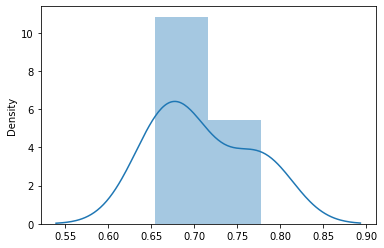

In [208]:
sns.distplot(a_df_new)

**Task 3A**


<Figure size 1080x720 with 0 Axes>

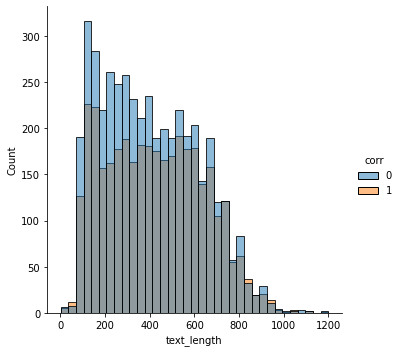

In [209]:
plt.figure(figsize=(15,10))
sns.displot(data=train_df_new, x='text_length', hue='corr', palette='tab10')
# sns.displot(data=train_df_new, x='text_length', hue='', kind='kde', palette='tab10', rug=True)

**Now to make use of the 'page' column Feature as well as adding the log of the inlink feature to see how much the prediction accuracy  improves**

In [210]:
train_df_new1=pd.read_csv(PATH+'qb.train.csv')
train_df_new1.head()

,row,body_score,page,answer,text,category,tournaments,answer_type,corr,inlinks
0,1,127.398036,Comus (John Milton),Comus (John Milton),First performed in Ludlow Castle by the childr...,Literature,2000 ACF Nationals,work,True,62
1,2,50.212336,Circe,Comus (John Milton),First performed in Ludlow Castle by the childr...,Literature,2000 ACF Nationals,None,False,5
2,3,44.767071,Satyr,Comus (John Milton),First performed in Ludlow Castle by the childr...,Literature,2000 ACF Nationals,None,False,6
3,4,44.058274,Philip K. Dick,Wilfred Owen,This author is convinced by another to publish...,Literature,2009 ACF Winter,people,False,22
4,5,40.675249,Honore de Balzac,Wilfred Owen,This author is convinced by another to publish...,Literature,2009 ACF Winter,None,False,0


In [211]:
train_df_new1['tournaments_year'] = train_df_new1['tournaments'].str[:4].astype(int)
train_df_new1 = pd.get_dummies(train_df_new1, columns=['answer_type'])
train_df_new1=pd.get_dummies(train_df_new1, columns=['tournaments_year'])
train_df_new1['text_length']=train_df_new1['text'].str.len()
train_df_new1['page_length']=train_df_new1['page'].str.len()
train_df_new1['inlinks'] +=1
train_df_new1['inlinks_log']=np.log2(train_df_new1['inlinks'])
train_df_new1.head()

,row,body_score,page,answer,text,category,tournaments,corr,inlinks,answer_type_None,...,tournaments_year_2004,tournaments_year_2005,tournaments_year_2006,tournaments_year_2007,tournaments_year_2008,tournaments_year_2009,tournaments_year_2010,text_length,page_length,inlinks_log
0,1,127.398036,Comus (John Milton),Comus (John Milton),First performed in Ludlow Castle by the childr...,Literature,2000 ACF Nationals,True,63,0,...,0,0,0,0,0,0,0,352,19,5.977280
1,2,50.212336,Circe,Comus (John Milton),First performed in Ludlow Castle by the childr...,Literature,2000 ACF Nationals,False,6,1,...,0,0,0,0,0,0,0,352,5,2.584963
2,3,44.767071,Satyr,Comus (John Milton),First performed in Ludlow Castle by the childr...,Literature,2000 ACF Nationals,False,7,1,...,0,0,0,0,0,0,0,352,5,2.807355
3,4,44.058274,Philip K. Dick,Wilfred Owen,This author is convinced by another to publish...,Literature,2009 ACF Winter,False,23,0,...,0,0,0,0,0,1,0,327,14,4.523562
4,5,40.675249,Honore de Balzac,Wilfred Owen,This author is convinced by another to publish...,Literature,2009 ACF Winter,False,1,1,...,0,0,0,0,0,1,0,327,16,0.000000


In [212]:
train_df_new1['corr']=train_df_new1['corr'].map({True:1,False:0})
train_df_new1.drop(['row','page','answer','text','category','tournaments'],axis=1,inplace=True)
train_df_new1.head()

,body_score,corr,inlinks,answer_type_None,answer_type_abs,answer_type_anim,answer_type_char,answer_type_event,answer_type_org,answer_type_people,...,tournaments_year_2004,tournaments_year_2005,tournaments_year_2006,tournaments_year_2007,tournaments_year_2008,tournaments_year_2009,tournaments_year_2010,text_length,page_length,inlinks_log
0,127.398036,1,63,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,352,19,5.977280
1,50.212336,0,6,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,352,5,2.584963
2,44.767071,0,7,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,352,5,2.807355
3,44.058274,0,23,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,327,14,4.523562
4,40.675249,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,327,16,0.000000


In [213]:
new_x1=train_df_new1.drop(['corr'],axis=1)
new_y1=train_df_new1['corr']
x_train3, x_test3, y_train3, y_test3=train_test_split(new_x1,new_y1,test_size=0.2,random_state=0)

In [214]:
ss_train3 = StandardScaler()
x_train3 = ss_train3.fit_transform(x_train3)
ss_test3 = StandardScaler()
x_test3 = ss_test3.fit_transform(x_test3)

In [215]:
lr3=LogisticRegression(solver='lbfgs', max_iter=1000)
lr3.fit(x_train3,y_train3)
lr_score3=round(lr3.score(x_test3,y_test3),3)
# lr_score3=round(cross_val_score(lr, x_test3,y_test3, cv=5,scoring='accuracy').mean(),3)
lr_predictions3=lr3.predict(x_test3)
cm3 = confusion_matrix(lr_predictions3, y_test3)
print(cm3)

[[737 296]
 [192 391]]


In [216]:
print('MSE:',mean_squared_error(y_test3,lr_predictions3))

MSE: 0.30198019801980197


**given from the mean squred error, it shows that there are certain amount of errors in the model with the features i added**

In [217]:
svm3=LinearSVC(max_iter=10000)
svm3.fit(x_train3,y_train3)
svm_score3=round(svm3.score(x_test3,y_test3),3)
# svm_score3=round(cross_val_score(svm, x_test3,y_test3, cv=5,scoring='accuracy').mean(),3)
svm_predictions3=svm3.predict(x_test3)
cm3 = confusion_matrix(svm_predictions3, y_test3)
print(cm3)

[[749 299]
 [180 388]]


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [218]:
dt3=DecisionTreeClassifier(max_depth=3,random_state=0)
dt3.fit(x_train3,y_train3)
dt_score3=round(dt3.score(x_test3,y_test3),3)
# dt_score3=round(cross_val_score(dt, x_test3,y_test3, cv=5,scoring='accuracy').mean(),3)
dt_predictions3=dt3.predict(x_test3)
cm3 = confusion_matrix(dt_predictions3, y_test3)
print(cm3)

[[889 319]
 [ 40 368]]


In [219]:
accuracy_of_model3={
    "Logistic Regression" : [lr_score,lr_score2,lr_score3],
    "SVM" : [svm_score,svm_score2,svm_score3],
    "Decision Tree":[dt_score,dt_score2,dt_score3]
}
a_df_new1 = pd.DataFrame(accuracy_of_model3)
a_df_new1

,Logistic Regression,SVM,Decision Tree
0,0.655,0.663,0.778
1,0.689,0.694,0.778
2,0.698,0.704,0.778


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


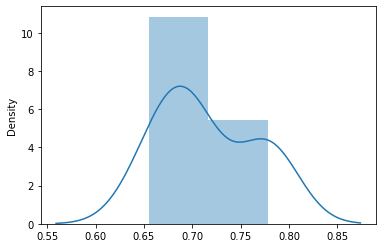

In [220]:
sns.distplot(a_df_new1)

**referring in continuation to Task 2b and 3a**


**when checking the score. the prediction from the accuracy seems to be improved after adding the 'page' column feature with the log of inlink**

**Training the New Models with the 'body_score&text_length' feature**


In [221]:
train_df_new2=pd.read_csv(PATH+'qb.train.csv')
train_df_new2.head()

,row,body_score,page,answer,text,category,tournaments,answer_type,corr,inlinks
0,1,127.398036,Comus (John Milton),Comus (John Milton),First performed in Ludlow Castle by the childr...,Literature,2000 ACF Nationals,work,True,62
1,2,50.212336,Circe,Comus (John Milton),First performed in Ludlow Castle by the childr...,Literature,2000 ACF Nationals,None,False,5
2,3,44.767071,Satyr,Comus (John Milton),First performed in Ludlow Castle by the childr...,Literature,2000 ACF Nationals,None,False,6
3,4,44.058274,Philip K. Dick,Wilfred Owen,This author is convinced by another to publish...,Literature,2009 ACF Winter,people,False,22
4,5,40.675249,Honore de Balzac,Wilfred Owen,This author is convinced by another to publish...,Literature,2009 ACF Winter,None,False,0


In [222]:
train_df_new2['tournaments_year'] = train_df_new2['tournaments'].str[:4].astype(int)
train_df_new2 = pd.get_dummies(train_df_new2, columns=['answer_type'])
train_df_new2=pd.get_dummies(train_df_new2, columns=['tournaments_year'])

In [223]:
train_df_new2['text_length']=train_df_new2['text'].str.len()
# train_df_new2['page_length']=train_df_new2['page'].str.len()
# train_df_new2['body_score'] +=1
# train_df_new2['body_score_log']=np.log2(train_df_new2['body_score'])
# train_df_new1['inlinks'] +=1
# train_df_new1['inlinks_log']=np.log2(train_df_new1['inlinks'])
train_df_new2['body_score&text_length']=train_df_new2['body_score']*train_df_new2['text_length']
# train_df_new1['body_score&page_length']=train_df_new1['body_score']*train_df_new1['page_length']

train_df_new2.head()

,row,body_score,page,answer,text,category,tournaments,corr,inlinks,answer_type_None,...,tournaments_year_2003,tournaments_year_2004,tournaments_year_2005,tournaments_year_2006,tournaments_year_2007,tournaments_year_2008,tournaments_year_2009,tournaments_year_2010,text_length,body_score&text_length
0,1,127.398036,Comus (John Milton),Comus (John Milton),First performed in Ludlow Castle by the childr...,Literature,2000 ACF Nationals,True,62,0,...,0,0,0,0,0,0,0,0,352,44844.108706
1,2,50.212336,Circe,Comus (John Milton),First performed in Ludlow Castle by the childr...,Literature,2000 ACF Nationals,False,5,1,...,0,0,0,0,0,0,0,0,352,17674.742171
2,3,44.767071,Satyr,Comus (John Milton),First performed in Ludlow Castle by the childr...,Literature,2000 ACF Nationals,False,6,1,...,0,0,0,0,0,0,0,0,352,15758.009078
3,4,44.058274,Philip K. Dick,Wilfred Owen,This author is convinced by another to publish...,Literature,2009 ACF Winter,False,22,0,...,0,0,0,0,0,0,1,0,327,14407.055571
4,5,40.675249,Honore de Balzac,Wilfred Owen,This author is convinced by another to publish...,Literature,2009 ACF Winter,False,0,1,...,0,0,0,0,0,0,1,0,327,13300.806490


**i tried to just see which features to use so i just removed the page and inlinks_log and added the product body_score and text_length as a feature interaction**

In [224]:
train_df_new2['corr']=train_df_new2['corr'].map({True:1,False:0})
train_df_new2.drop(['row','page','answer','text','category','tournaments'],axis=1,inplace=True)
train_df_new2.head()

,body_score,corr,inlinks,answer_type_None,answer_type_abs,answer_type_anim,answer_type_char,answer_type_event,answer_type_org,answer_type_people,...,tournaments_year_2003,tournaments_year_2004,tournaments_year_2005,tournaments_year_2006,tournaments_year_2007,tournaments_year_2008,tournaments_year_2009,tournaments_year_2010,text_length,body_score&text_length
0,127.398036,1,62,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,352,44844.108706
1,50.212336,0,5,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,352,17674.742171
2,44.767071,0,6,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,352,15758.009078
3,44.058274,0,22,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,327,14407.055571
4,40.675249,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,327,13300.806490


In [225]:
new_df = pd.DataFrame(train_df_new2, columns=['body_score','inlinks','corr','text_length', 'body_score&text_length'])
new_df

,body_score,inlinks,corr,text_length,body_score&text_length
0,127.398036,62,1,352,44844.108706
1,50.212336,5,0,352,17674.742171
2,44.767071,6,0,352,15758.009078
3,44.058274,22,0,327,14407.055571
4,40.675249,0,0,327,13300.806490
...,...,...,...,...,...
8074,51.072087,3,0,461,23544.232113
8075,42.298305,18,0,347,14677.511977
8076,40.570231,8,0,347,14077.870232
8077,37.679422,9,0,347,13074.759450


In [226]:
# sns.pairplot(new_df, hue='corr',palette='tab10')

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


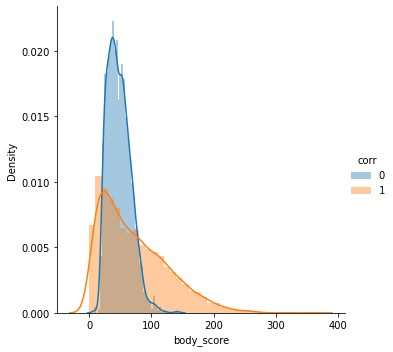

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with simi

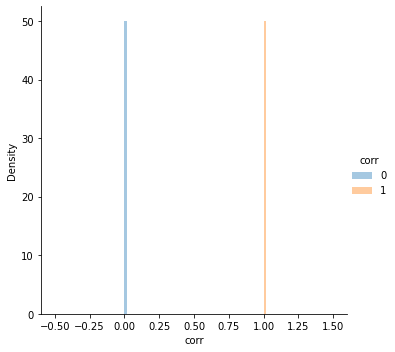

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


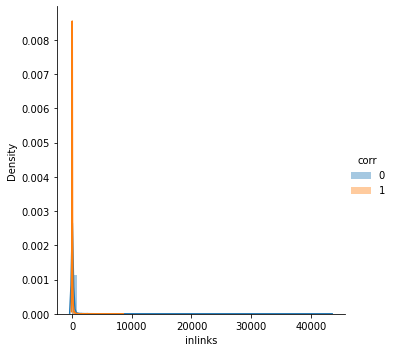

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


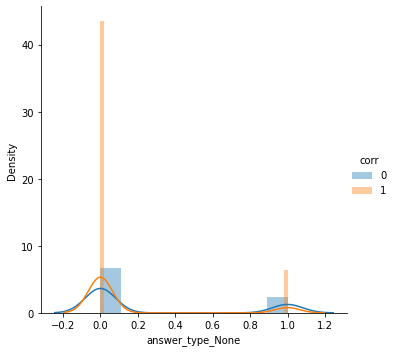

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


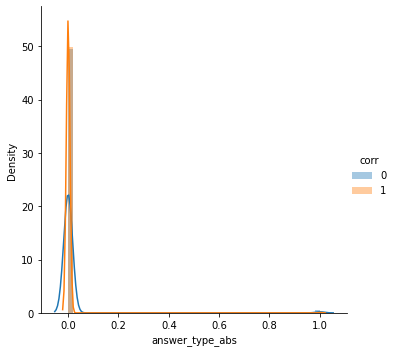

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


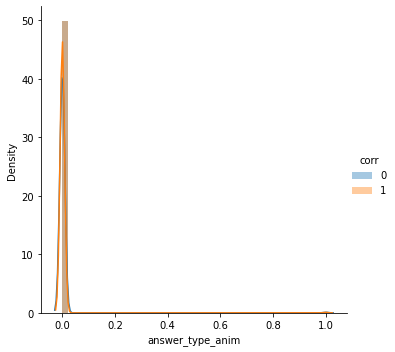

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


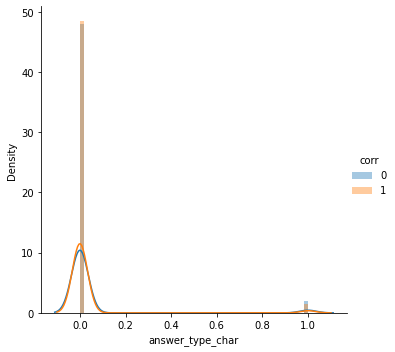

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


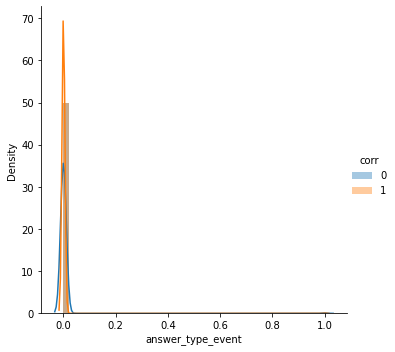

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


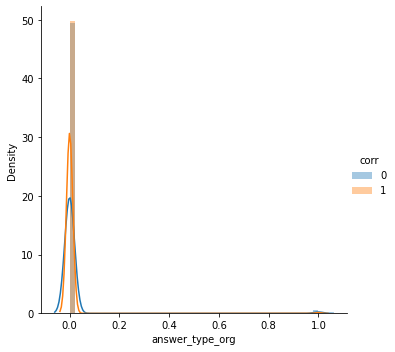

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


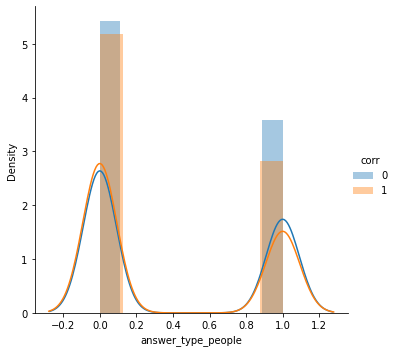

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


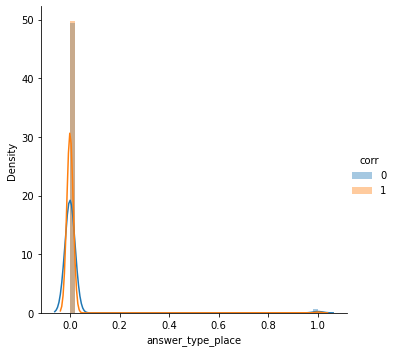

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


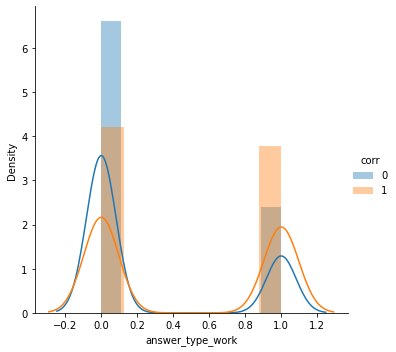

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


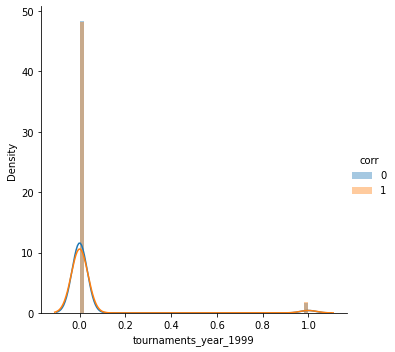

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


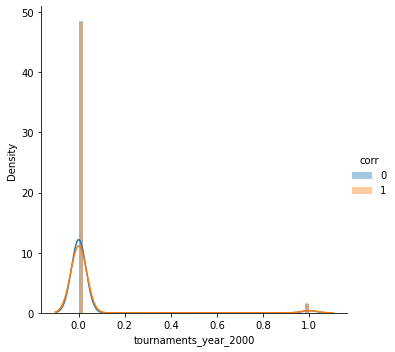

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


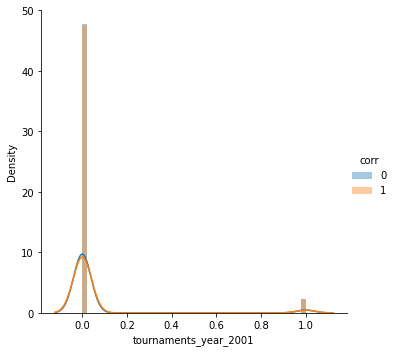

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


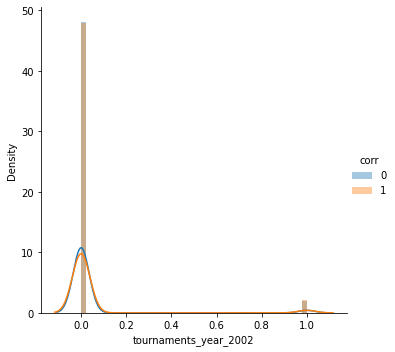

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


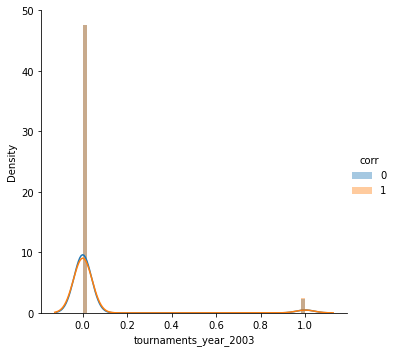

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


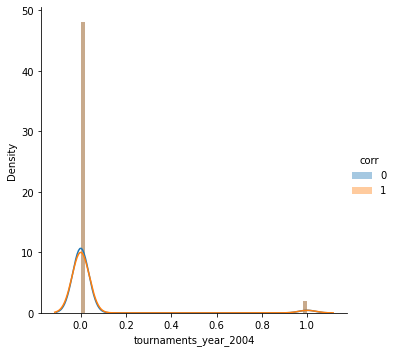

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


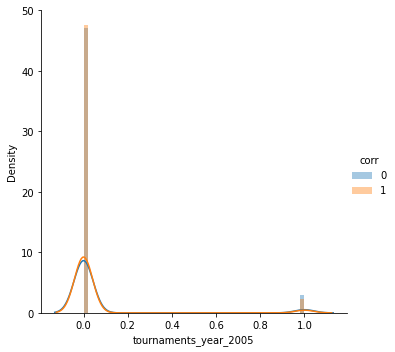

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


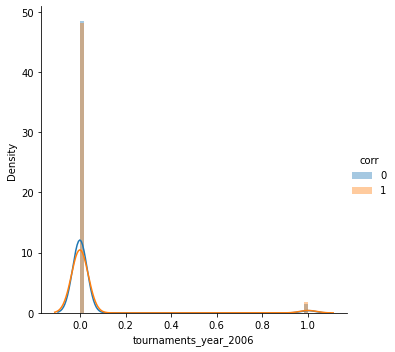

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


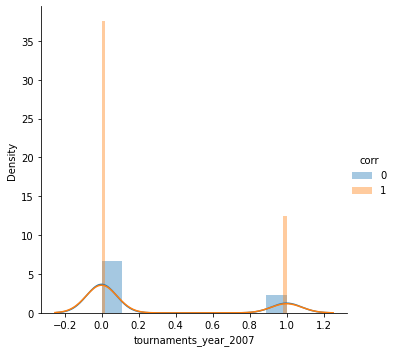

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


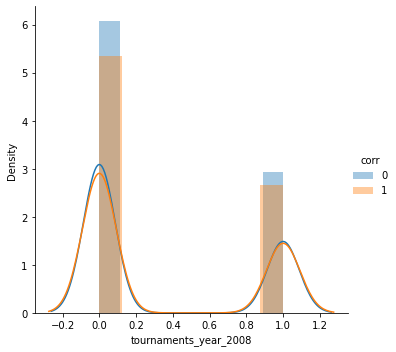

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


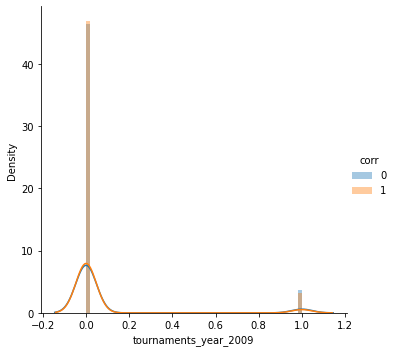

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


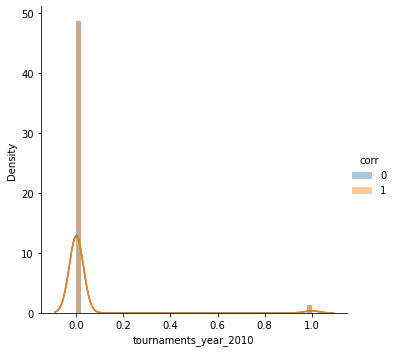

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


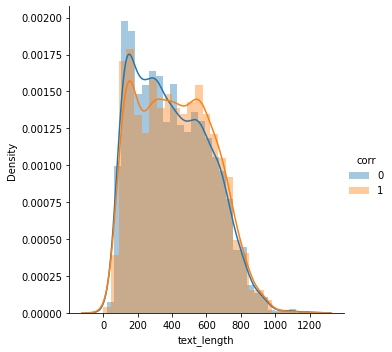

In [227]:
for idx, feature in enumerate(list(train_df_new2.columns)[:-1]):
  fg=sns.FacetGrid(train_df_new2,hue='corr',size=5)
  fg.map(sns.distplot, feature).add_legend()
  plt.show()

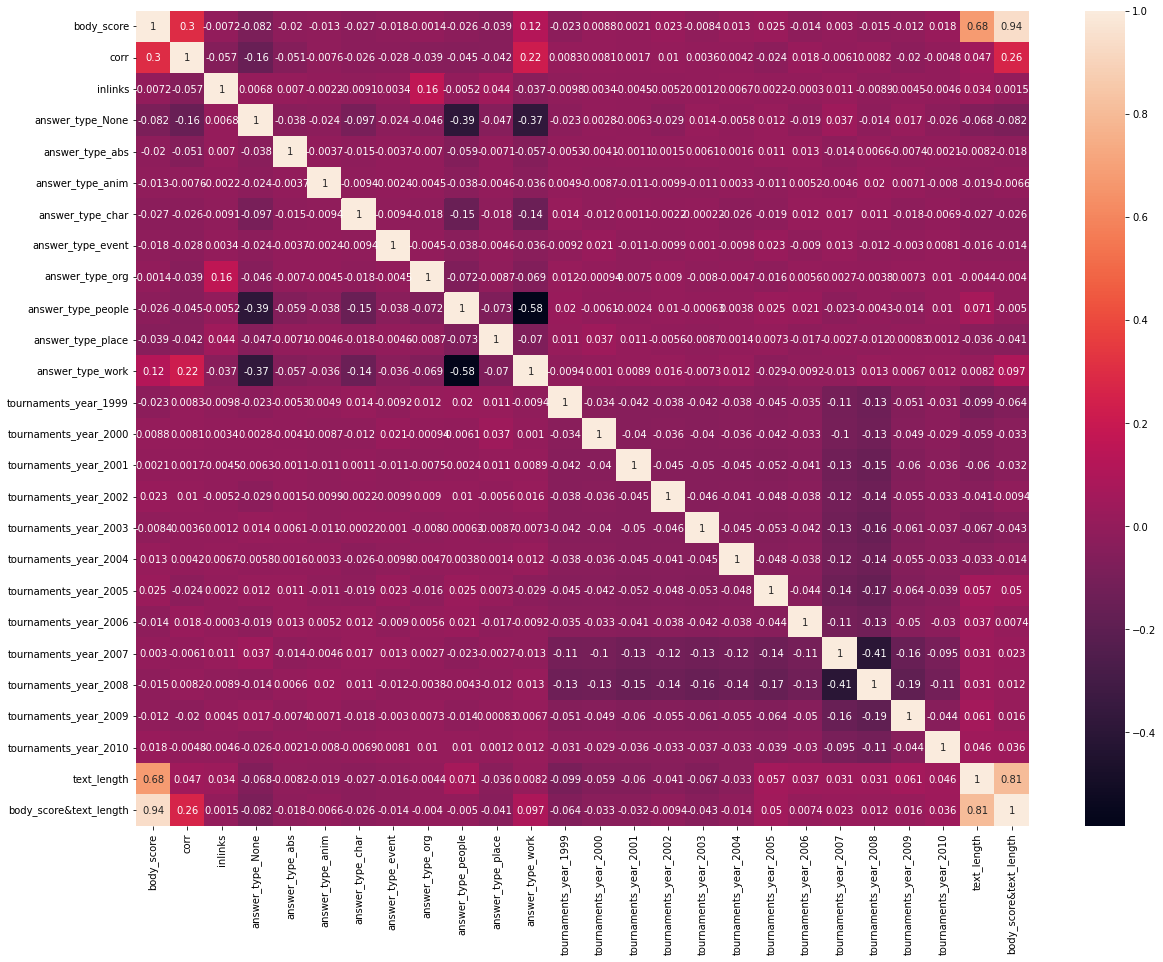

In [228]:
plt.figure(figsize=(20,15))
sns.heatmap(train_df_new2.corr(),annot=True)

In [229]:
new_x2=train_df_new2.drop(['corr'],axis=1)
new_y2=train_df_new2['corr']
x_train4, x_test4, y_train4, y_test4=train_test_split(new_x2,new_y2,test_size=0.2,random_state=0)

In [230]:
ss_train4 = StandardScaler()
x_train4= ss_train4.fit_transform(x_train4)
ss_test4 = StandardScaler()
x_test4 = ss_test4.fit_transform(x_test4) 

In [231]:
lr4=LogisticRegression(solver='lbfgs', max_iter=1000)
lr4.fit(x_train4,y_train4)
lr_score4=round(lr4.score(x_test4,y_test4),3)
# lr_score3=round(cross_val_score(lr, x_test3,y_test3, cv=5,scoring='accuracy').mean(),3)
lr_predictions4=lr4.predict(x_test4)
cm4 = confusion_matrix(lr_predictions4, y_test4)
print(cm3)

[[889 319]
 [ 40 368]]


In [232]:
print('MSE:',mean_squared_error(y_test4,lr_predictions4))

MSE: 0.2908415841584158


In [233]:
svm4=LinearSVC(max_iter=10000)
svm4.fit(x_train4,y_train4)
svm_score4=round(svm4.score(x_test4,y_test4),3)
# svm_score3=round(cross_val_score(svm, x_test3,y_test3, cv=5,scoring='accuracy').mean(),3)
svm_predictions4=svm4.predict(x_test4)
cm3 = confusion_matrix(svm_predictions4, y_test4)
print(cm4)

[[733 274]
 [196 413]]


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [234]:
dt4=DecisionTreeClassifier(max_depth=3,random_state=0)
dt4.fit(x_train4,y_train4)
dt_score4=round(dt4.score(x_test4,y_test4),3)
# dt_score3=round(cross_val_score(dt, x_test3,y_test3, cv=5,scoring='accuracy').mean(),3)
dt_predictions4=dt4.predict(x_test4)
cm4 = confusion_matrix(dt_predictions4, y_test4)
print(cm4)

[[889 319]
 [ 40 368]]


In [235]:
dt_predictions4=dt4.predict(x_test4)
cm4 = confusion_matrix(dt_predictions4, y_test4)
print(cm4)

[[889 319]
 [ 40 368]]


In [236]:
accuracy_of_model4={
    "Logistic Regression" : [lr_score,lr_score2,lr_score3,lr_score4],
    "SVM" : [svm_score,svm_score2,svm_score3,svm_score4],
    "Decision Tree":[dt_score,dt_score2,dt_score3,dt_score4]
}
a_df_new2 = pd.DataFrame(accuracy_of_model4)
a_df_new2

,Logistic Regression,SVM,Decision Tree
0,0.655,0.663,0.778
1,0.689,0.694,0.778
2,0.698,0.704,0.778
3,0.709,0.711,0.778


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


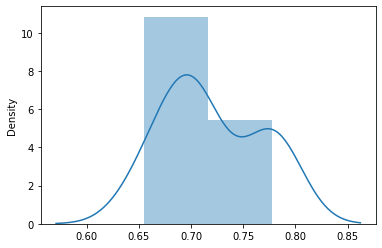

In [237]:
sns.distplot(a_df_new2)

the decision tree has been highest predictor on the accuracy

**new Feature by adding the log of body_score**

In [238]:
train_df_new3=pd.read_csv(PATH+'qb.train.csv')
train_df_new3.head()

,row,body_score,page,answer,text,category,tournaments,answer_type,corr,inlinks
0,1,127.398036,Comus (John Milton),Comus (John Milton),First performed in Ludlow Castle by the childr...,Literature,2000 ACF Nationals,work,True,62
1,2,50.212336,Circe,Comus (John Milton),First performed in Ludlow Castle by the childr...,Literature,2000 ACF Nationals,None,False,5
2,3,44.767071,Satyr,Comus (John Milton),First performed in Ludlow Castle by the childr...,Literature,2000 ACF Nationals,None,False,6
3,4,44.058274,Philip K. Dick,Wilfred Owen,This author is convinced by another to publish...,Literature,2009 ACF Winter,people,False,22
4,5,40.675249,Honore de Balzac,Wilfred Owen,This author is convinced by another to publish...,Literature,2009 ACF Winter,None,False,0


In [239]:
# train_df_new3['tournaments_year'] = train_df_new3['tournaments'].str[:4].astype(int)
train_df_new3 = pd.get_dummies(train_df_new3, columns=['answer_type'])
# train_df_new3=pd.get_dummies(train_df_new3, columns=['tournaments_year'])

In [240]:
train_df_new3['text_length']=train_df_new3['text'].str.len()
# train_df_new3['page_length']=train_df_new3['page'].str.len()
train_df_new3['body_score'] +=1
train_df_new3['body_score_log']=np.log2(train_df_new3['body_score'])
train_df_new3['inlinks'] +=1
train_df_new3['inlinks_log']=np.log2(train_df_new3['inlinks'])
train_df_new3['body_score'] +=1
train_df_new3['body_score_log']=np.log2(train_df_new3['body_score'])
train_df_new3['body_score&text_length']=train_df_new3['body_score']*train_df_new3['text_length']
train_df_new3.head()

,row,body_score,page,answer,text,category,tournaments,corr,inlinks,answer_type_None,...,answer_type_char,answer_type_event,answer_type_org,answer_type_people,answer_type_place,answer_type_work,text_length,body_score_log,inlinks_log,body_score&text_length
0,1,129.398036,Comus (John Milton),Comus (John Milton),First performed in Ludlow Castle by the childr...,Literature,2000 ACF Nationals,True,63,0,...,0,0,0,0,0,1,352,7.015672,5.977280,45548.108706
1,2,52.212336,Circe,Comus (John Milton),First performed in Ludlow Castle by the childr...,Literature,2000 ACF Nationals,False,6,1,...,0,0,0,0,0,0,352,5.706319,2.584963,18378.742171
2,3,46.767071,Satyr,Comus (John Milton),First performed in Ludlow Castle by the childr...,Literature,2000 ACF Nationals,False,7,1,...,0,0,0,0,0,0,352,5.547421,2.807355,16462.009078
3,4,46.058274,Philip K. Dick,Wilfred Owen,This author is convinced by another to publish...,Literature,2009 ACF Winter,False,23,0,...,0,0,0,1,0,0,327,5.525388,4.523562,15061.055571
4,5,42.675249,Honore de Balzac,Wilfred Owen,This author is convinced by another to publish...,Literature,2009 ACF Winter,False,1,1,...,0,0,0,0,0,0,327,5.415328,0.000000,13954.806490


In [241]:
train_df_new3['corr']=train_df_new3['corr'].map({True:1,False:0})
train_df_new3.drop(['row','page','answer','text','category','tournaments'],axis=1,inplace=True)
train_df_new3.head()

,body_score,corr,inlinks,answer_type_None,answer_type_abs,answer_type_anim,answer_type_char,answer_type_event,answer_type_org,answer_type_people,answer_type_place,answer_type_work,text_length,body_score_log,inlinks_log,body_score&text_length
0,129.398036,1,63,0,0,0,0,0,0,0,0,1,352,7.015672,5.977280,45548.108706
1,52.212336,0,6,1,0,0,0,0,0,0,0,0,352,5.706319,2.584963,18378.742171
2,46.767071,0,7,1,0,0,0,0,0,0,0,0,352,5.547421,2.807355,16462.009078
3,46.058274,0,23,0,0,0,0,0,0,1,0,0,327,5.525388,4.523562,15061.055571
4,42.675249,0,1,1,0,0,0,0,0,0,0,0,327,5.415328,0.000000,13954.806490


In [242]:
new_df1 = pd.DataFrame(train_df_new3, columns=['body_score','inlinks','corr','text_length', 'body_score&text_length','body_score_log','inlinks_log'])
new_df1

,body_score,inlinks,corr,text_length,body_score&text_length,body_score_log,inlinks_log
0,129.398036,63,1,352,45548.108706,7.015672,5.977280
1,52.212336,6,0,352,18378.742171,5.706319,2.584963
2,46.767071,7,0,352,16462.009078,5.547421,2.807355
3,46.058274,23,0,327,15061.055571,5.525388,4.523562
4,42.675249,1,0,327,13954.806490,5.415328,0.000000
...,...,...,...,...,...,...,...
8074,53.072087,4,0,461,24466.232113,5.729881,2.000000
8075,44.298305,19,0,347,15371.511977,5.469180,4.247928
8076,42.570231,9,0,347,14771.870232,5.411773,3.169925
8077,39.679422,10,0,347,13768.759450,5.310319,3.321928


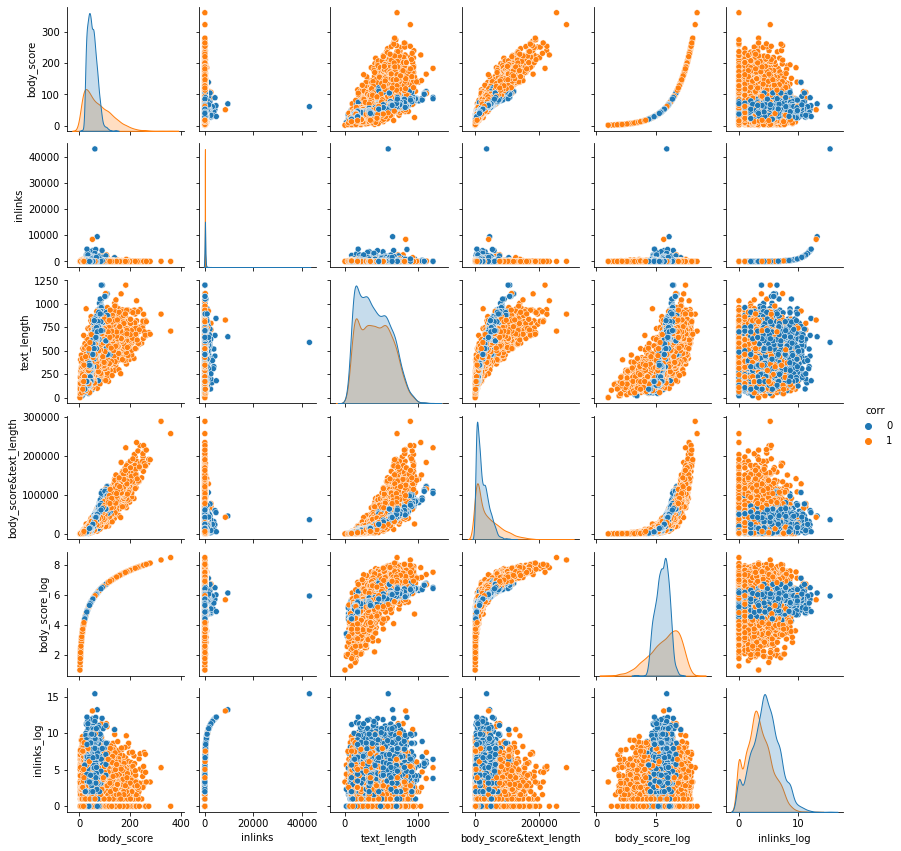

In [243]:
sns.pairplot(new_df1, hue='corr',palette='tab10',height=2)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


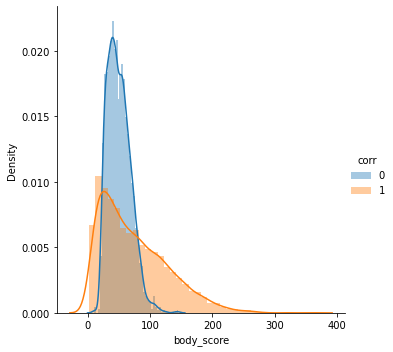

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with simi

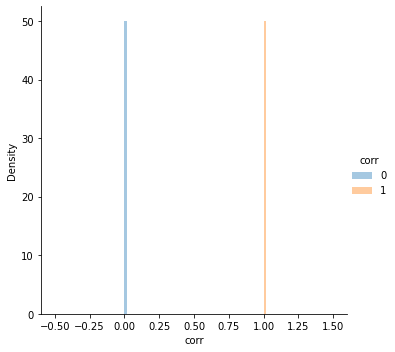

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


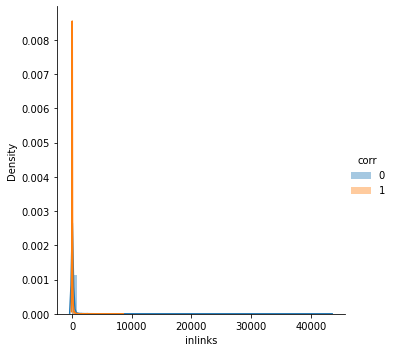

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


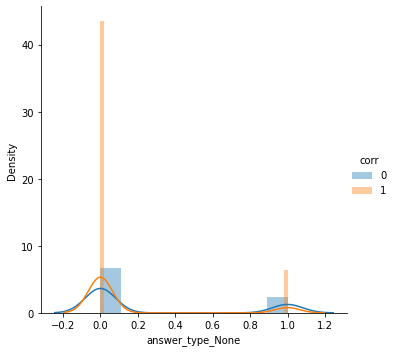

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


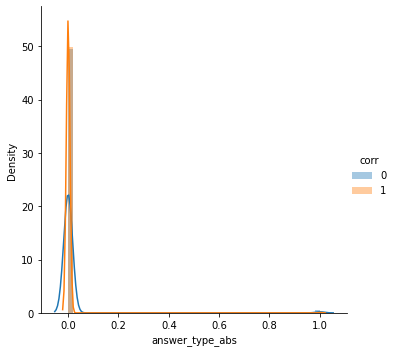

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


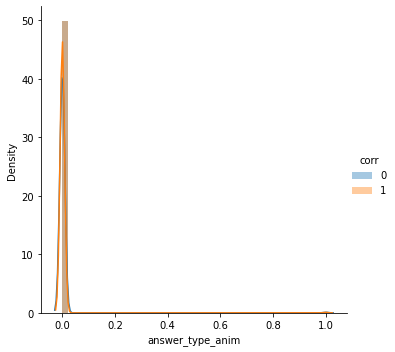

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


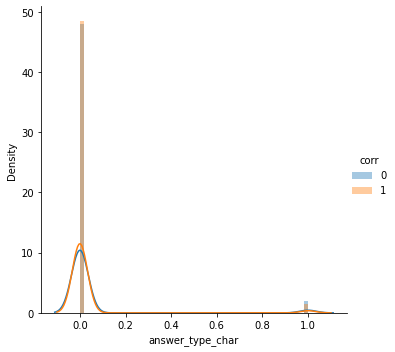

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


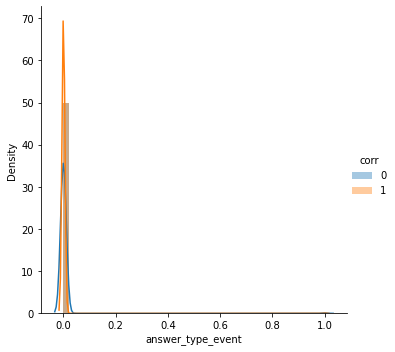

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


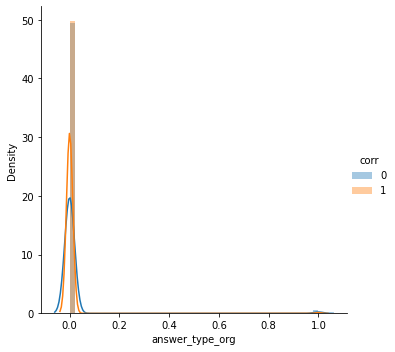

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


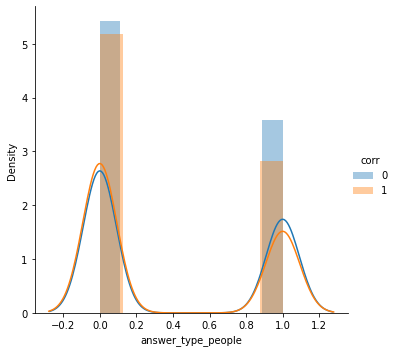

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


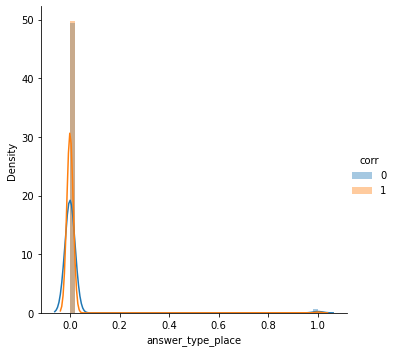

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


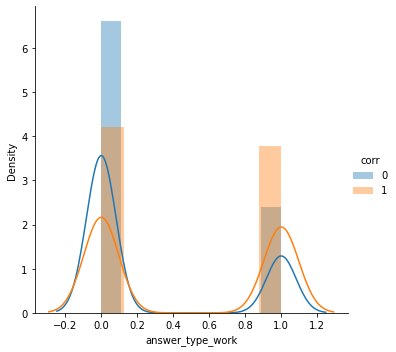

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


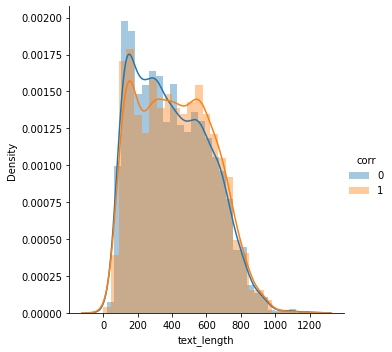

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


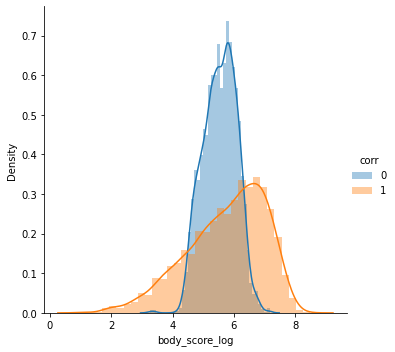

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


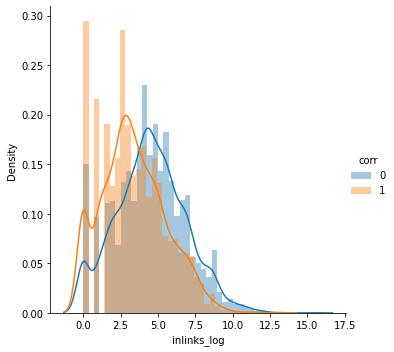

In [244]:
for idx, feature in enumerate(list(train_df_new3.columns)[:-1]):
  fg=sns.FacetGrid(train_df_new3,hue='corr',size=5)
  fg.map(sns.distplot, feature).add_legend()
  plt.show()

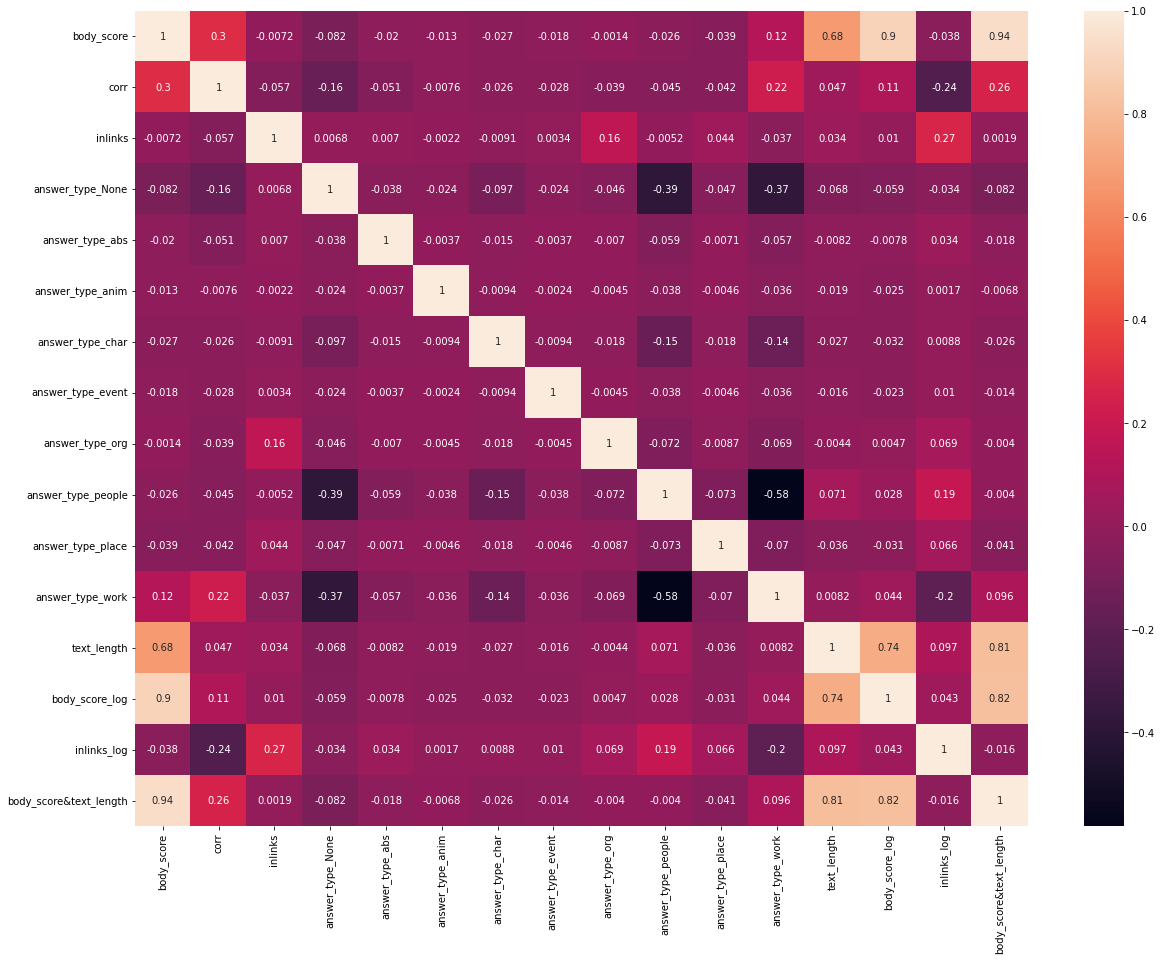

In [245]:
plt.figure(figsize=(20,15))
sns.heatmap(train_df_new3.corr(),annot=True)

In [246]:
new_x3=train_df_new3.drop(['corr'],axis=1)
new_y3=train_df_new3['corr']
x_train5, x_test5, y_train5, y_test5=train_test_split(new_x3,new_y3,test_size=0.2,random_state=0)

In [247]:
ss_train5 = StandardScaler()
x_train5= ss_train5.fit_transform(x_train5)
ss_test5 = StandardScaler()
x_test5 = ss_test5.fit_transform(x_test5) 

In [248]:
lr5=LogisticRegression(solver='lbfgs', max_iter=1000)
lr5.fit(x_train5,y_train5)
lr_score5=round(lr5.score(x_test5,y_test5),3)
# lr_score3=round(cross_val_score(lr, x_test3,y_test3, cv=5,scoring='accuracy').mean(),3)
lr_predictions5=lr5.predict(x_test5)
cm5 = confusion_matrix(lr_predictions5, y_test5)
print(cm5)

[[859 235]
 [ 70 452]]


In [249]:
print('MSE:',mean_squared_error(y_test5,lr_predictions5))

MSE: 0.18873762376237624


In [250]:
svm5=LinearSVC(max_iter=10000)
svm5.fit(x_train5,y_train5)
svm_score5=round(svm5.score(x_test5,y_test5),3)
# svm_score3=round(cross_val_score(svm, x_test3,y_test3, cv=5,scoring='accuracy').mean(),3)
svm_predictions5=svm5.predict(x_test5)
cm5 = confusion_matrix(svm_predictions5, y_test5)
print(cm5)

[[872 240]
 [ 57 447]]


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [251]:
print('MSE:',mean_squared_error(y_test5,svm_predictions5))

MSE: 0.18378712871287128


In [252]:
dt5=DecisionTreeClassifier(max_depth=3,random_state=0)
dt5.fit(x_train5,y_train4)
dt_score5=round(dt5.score(x_test5,y_test5),3)
# dt_score3=round(cross_val_score(dt, x_test3,y_test3, cv=5,scoring='accuracy').mean(),3)
dt_predictions5=dt5.predict(x_test5)
cm5 = confusion_matrix(dt_predictions5, y_test5)
print(cm5)

[[889 318]
 [ 40 369]]


In [253]:
print('MSE:',mean_squared_error(y_test5,dt_predictions5))

MSE: 0.22153465346534654


In [254]:
accuracy_of_model5={
    "Logistic Regression" : [lr_score,lr_score2,lr_score3,lr_score4,lr_score5],
    "SVM" : [svm_score,svm_score2,svm_score3,svm_score4,svm_score5],
    "Decision Tree":[dt_score,dt_score2,dt_score3,dt_score4,dt_score5]
}
a_df_new3 = pd.DataFrame(accuracy_of_model5)
a_df_new3

,Logistic Regression,SVM,Decision Tree
0,0.655,0.663,0.778
1,0.689,0.694,0.778
2,0.698,0.704,0.778
3,0.709,0.711,0.778
4,0.811,0.816,0.778


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


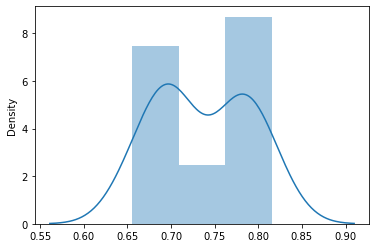

In [255]:
sns.distplot(a_df_new3)

**so i removed the tournament_year feature i engineered because it reduced the performance of the accuracy. when it was removed the accuracy went up a bit.
the page_length feature was removed as well**

**On adding just the text_length,the feature interaction between body_score and text_length body_score_log, inlinks_log features there was a significant increase in the accuracy performance. 
the Facet Graph above explains more about this information**

**Task 3B.**


**After adding the length of the Text feature, the prediction accuracy didnt improve as much as i thought it would, just a little. and also after adding the length of the page feature i engineered, didnt improve the prediction accuracy that much as that of the text feature because it seems to be increasing  and decreasing(Logistic Regression & SVM). so removing the page feature but also incoorporating the product of body score and textlength for feature interaction.**

**Y = B0 + B1x1 + B2x2 + B3x1x2**

**Then included the log of body_score as well as the log of the inlinks
After the normalization of the data that has been done. the accuracy seems to have improved for SVM rather than the decision tree.
so therefore the SVM has the highest prediction accuracy which will be used to test the predictions on the test data**

**Predicting on Test Data and Uploading to kaggle**

**Importing and Cleaning Testing Data**

In [256]:
test_df.head()

,row,body_score,page,text,category,tournaments,answer_type,inlinks
0,31,40.023617,Death in Venice,The protagonist of this novella is inspired to...,Literature,2001 ACF Fall,work,4
1,32,27.538799,The Eye of the World,The protagonist of this novella is inspired to...,Literature,2001 ACF Fall,work,1
2,33,26.976121,Carmilla,The protagonist of this novella is inspired to...,Literature,2001 ACF Fall,work,2
3,88,45.848831,A Passage to India,In a symbolic incident in this novel Ronny Hea...,Literature,2001 ACF Regionals,work,5
4,91,99.811169,The Cherry Orchard,"We first meet Fiers, the aging footman, in Act...",Literature,2001 ACF Regionals,work,11


In [257]:
# test_df['tournaments_year']= test_df['tournaments'].str[:4].astype(int)
test_df['text_length']=test_df['text'].str.len() #new feature
test_df.drop(['page','text','category','tournaments'],axis=1,inplace=True)
test_df = pd.get_dummies(test_df, columns=['answer_type'])
# test_df = pd.get_dummies(test_df, columns=['tournaments_year'])
test_df['body_score'] +=1
test_df['body_score_log']=np.log2(test_df['body_score'])
test_df['inlinks'] +=1
test_df['inlinks_log']=np.log2(train_df_new3['inlinks'])
test_df['body_score&Text_length']=test_df['body_score']*test_df['text_length']
test_df.head()

,row,body_score,inlinks,text_length,answer_type_None,answer_type_abs,answer_type_anim,answer_type_char,answer_type_event,answer_type_org,answer_type_people,answer_type_place,answer_type_work,body_score_log,inlinks_log,body_score&Text_length
0,31,41.023617,5,245,0,0,0,0,0,0,0,0,1,5.358383,5.977280,10050.786104
1,32,28.538799,2,245,0,0,0,0,0,0,0,0,1,4.834853,2.584963,6992.005797
2,33,27.976121,3,245,0,0,0,0,0,0,0,0,1,4.806124,2.807355,6854.149668
3,88,46.848831,6,127,0,0,0,0,0,0,0,0,1,5.549941,4.523562,5949.801561
4,91,100.811169,12,551,0,0,0,0,0,0,0,0,1,6.655512,0.000000,55546.953908


In [258]:
test_df.shape

(887, 16)

In [259]:
# x_train3,x_test3=x_train3.align(test_df,join='left',axis=1)
# test_df.head()
# from xgboost import XGBRegressor
# model= XGBRegressor(n_estimators=350, max_depth=15,learning_rate=.1,random_state=1,\
#                     n_jobs=10,subsample=1,min_child_weight=0.6)
# model.fit(x_train3,y_train3)
# preds_test=model.predict(x_test3)

In [260]:
guess_df['row'] = test_df['row']
test_df.drop('row', axis=1, inplace=True)

In [261]:
guess_df.head()

,row,corr
0,31,False
1,32,False
2,33,False
3,88,False
4,91,True


In [262]:
predict=svm5.predict(test_df)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearSVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [263]:
guess_df['corr']=predict
guess_df['corr']=guess_df['corr'].map({0:False, 1:True})
guess_df.head(50)

,row,corr
0,31,False
1,32,False
2,33,False
3,88,False
4,91,False
5,139,False
6,140,False
7,141,False
8,142,False
9,188,False


In [264]:
output=pd.DataFrame({'row':guess_df.row,'corr':guess_df['corr']})
output.to_csv('submission.csv', index=False,header=1)
print("Your submission was successfully saved!")

Your submission was successfully saved!


**Task 4a**

**Final Score: 0.59838**

**Username: MADENIYI_DID**

**Task 4b**

**Error Analysis**

In [265]:
# plt.matshow(cm, cmap=plt.cm.gray)
# plt.show()

In [266]:
# plt.matshow(cm2, cmap=plt.cm.gray)
# plt.show()

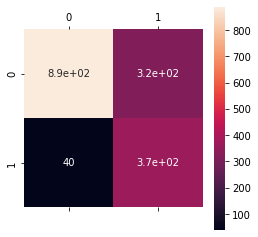

In [267]:
plt.matshow(cm5, cmap=plt.cm.gray)
sns.heatmap(cm5,annot=True)
plt.show()


In [268]:
def draw_learning_curves(new_x3,new_y3,estimator, num_trainings):
  train_sizes, train_scores, test_scores=learning_curve(estimator,new_x3,new_y3,cv=5,n_jobs=1, train_sizes=np.linspace(0.1,1.0,num_trainings))
  print(np.linspace(.1,1.0,num_trainings))
  print(train_sizes)
  print(train_scores)
  print(test_scores)
  train_scores_mean =np.mean(train_scores,axis=1)
  print(train_scores_mean)
  train_scores_std =np.std(train_scores,axis=1)
  test_scores_mean =np.mean(test_scores,axis=1)
  test_scores_std =np.std(test_scores,axis=1)

  plt.grid()
  plt.title("Learning Curves")
  plt.xlabel("Training Examples")
  plt.ylabel("Score")
  
  plt.plot(train_sizes,train_scores_mean, 'o-',color="g", label="Training score")
  plt.plot(train_sizes,test_scores_mean, 'o-',color="y", label="Cross-validation score")

  plt.legend(loc="best")
  plt.show()

[0.1   0.325 0.55  0.775 1.   ]
[ 646 2100 3554 5008 6463]
[[0.67027864 0.74767802 0.74767802 0.74767802 0.74767802]
 [0.72333333 0.7252381  0.70809524 0.70809524 0.70809524]
 [0.71468768 0.71496905 0.7144063  0.72003376 0.72003376]
 [0.71525559 0.7110623  0.7120607  0.71565495 0.71645367]
 [0.7095776  0.71066068 0.71746867 0.71886121 0.71886121]]
[[0.72339109 0.71782178 0.70730198 0.70111386 0.70092879]
 [0.72710396 0.70730198 0.69863861 0.68007426 0.68668731]
 [0.7240099  0.71410891 0.70173267 0.69678218 0.69845201]
 [0.72339109 0.71905941 0.70420792 0.70173267 0.70340557]
 [0.73143564 0.71658416 0.71225248 0.71287129 0.71517028]]
[0.73219814 0.71457143 0.71682611 0.71409744 0.71508587]


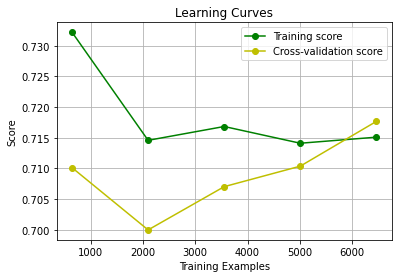

In [269]:
draw_learning_curves(new_x3,new_y3,lr5, 5)




/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number

[0.1   0.325 0.55  0.775 1.   ]
[ 646 2100 3554 5008 6463]
[[0.4752322  0.63467492 0.47058824 0.51083591 0.34674923]
 [0.50333333 0.60285714 0.43333333 0.57952381 0.55761905]
 [0.47917839 0.55627462 0.40236353 0.47242544 0.48733821]
 [0.41134185 0.4918131  0.40035942 0.42372204 0.62779553]
 [0.60993347 0.51570478 0.61457527 0.38743618 0.39656506]]
[[0.39851485 0.60334158 0.46720297 0.51980198 0.37894737]
 [0.5        0.6039604  0.43007426 0.60519802 0.55913313]
 [0.47153465 0.53155941 0.41955446 0.48576733 0.48606811]
 [0.37438119 0.4789604  0.40408416 0.4424505  0.64891641]
 [0.61138614 0.50309406 0.62128713 0.41089109 0.38266254]]
[0.4876161  0.53533333 0.47951604 0.47100639 0.50484295]


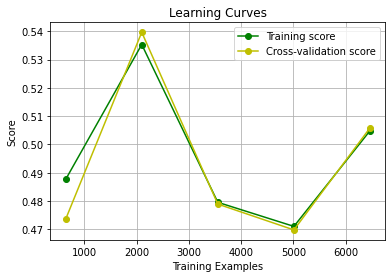

In [270]:
draw_learning_curves(new_x3,new_y3,svm5, 5)

[0.1   0.325 0.55  0.775 1.   ]
[ 646 2100 3554 5008 6463]
[[0.73529412 0.79566563 0.79566563 0.79566563 0.79566563]
 [0.76428571 0.76285714 0.76095238 0.76095238 0.76095238]
 [0.76167698 0.76055149 0.76027012 0.76083286 0.76083286]
 [0.75898562 0.75978435 0.7561901  0.76377796 0.76257987]
 [0.7624942  0.76295838 0.76435092 0.76450565 0.75816184]]
[[0.75680693 0.75742574 0.7605198  0.75928218 0.7752322 ]
 [0.75556931 0.75928218 0.76113861 0.75618812 0.76965944]
 [0.7549505  0.75866337 0.76423267 0.75247525 0.76594427]
 [0.75247525 0.75742574 0.76361386 0.75247525 0.76718266]
 [0.75742574 0.7549505  0.76237624 0.75309406 0.7628483 ]]
[0.78359133 0.762      0.76083286 0.76026358 0.7624942 ]


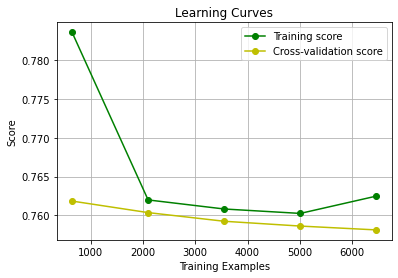

In [271]:
draw_learning_curves(new_x3,new_y3,dt5, 5)

**Given the learning curves above, this enabled me to determine if more data, more features are needed to improve the accuracy of the predictions on the model. Or maybe a new learning or model classifier can be used to improve the accuracy. it shows from the learning curve after adding the new features i.e text_length feature and page_length feature. there wasnt much improved performance (referring to Task 2B)especially when i added the page-length feature; the accuracy keeps decreasing. so i removed the page feature but when i infused a feature interaction between body score and text length, log of body_score and log of inlinks there was an increase on the accuracy. i can say on a estimated average of 81% accuracy there about. i would still say its still a good accuracy despite using the 3 model classifers. From the learning curve, it also proves that the SVM model has the best improved accuracy than Logistic and Decision Tree models. Notice that after adding the page_length feature, the accuracy didnt improve much for the svm model on the training and test data giving the increase and decrease. so i would say that from this error analysis that add more features might not improve the accuracy of the model that much at this point but if possible using another model classifier might improve the accuracy. on manually checking the train data it was discovered that there are duplicates and but didnt seem to understand why. it shows from the data that for every person's answer to each feature values are being duplicated but on checking the train data directly it shows that there aren't duplicates. There seem to be a pattern whereby out of the number of answer duplicates for example, for four duplicates there would be only one correct answer(TRUE) and the rest would be an incorrect answer(FALSE). i thought reducing those duplicates would improve the accuracy but there arent any duplicates. i think this is difficult to determine if this can be corrected in a way because in terms of real world data  as they're certain percentage of false answers than true answers hence an imbalanced data and i think this would also be due to the answertype**  

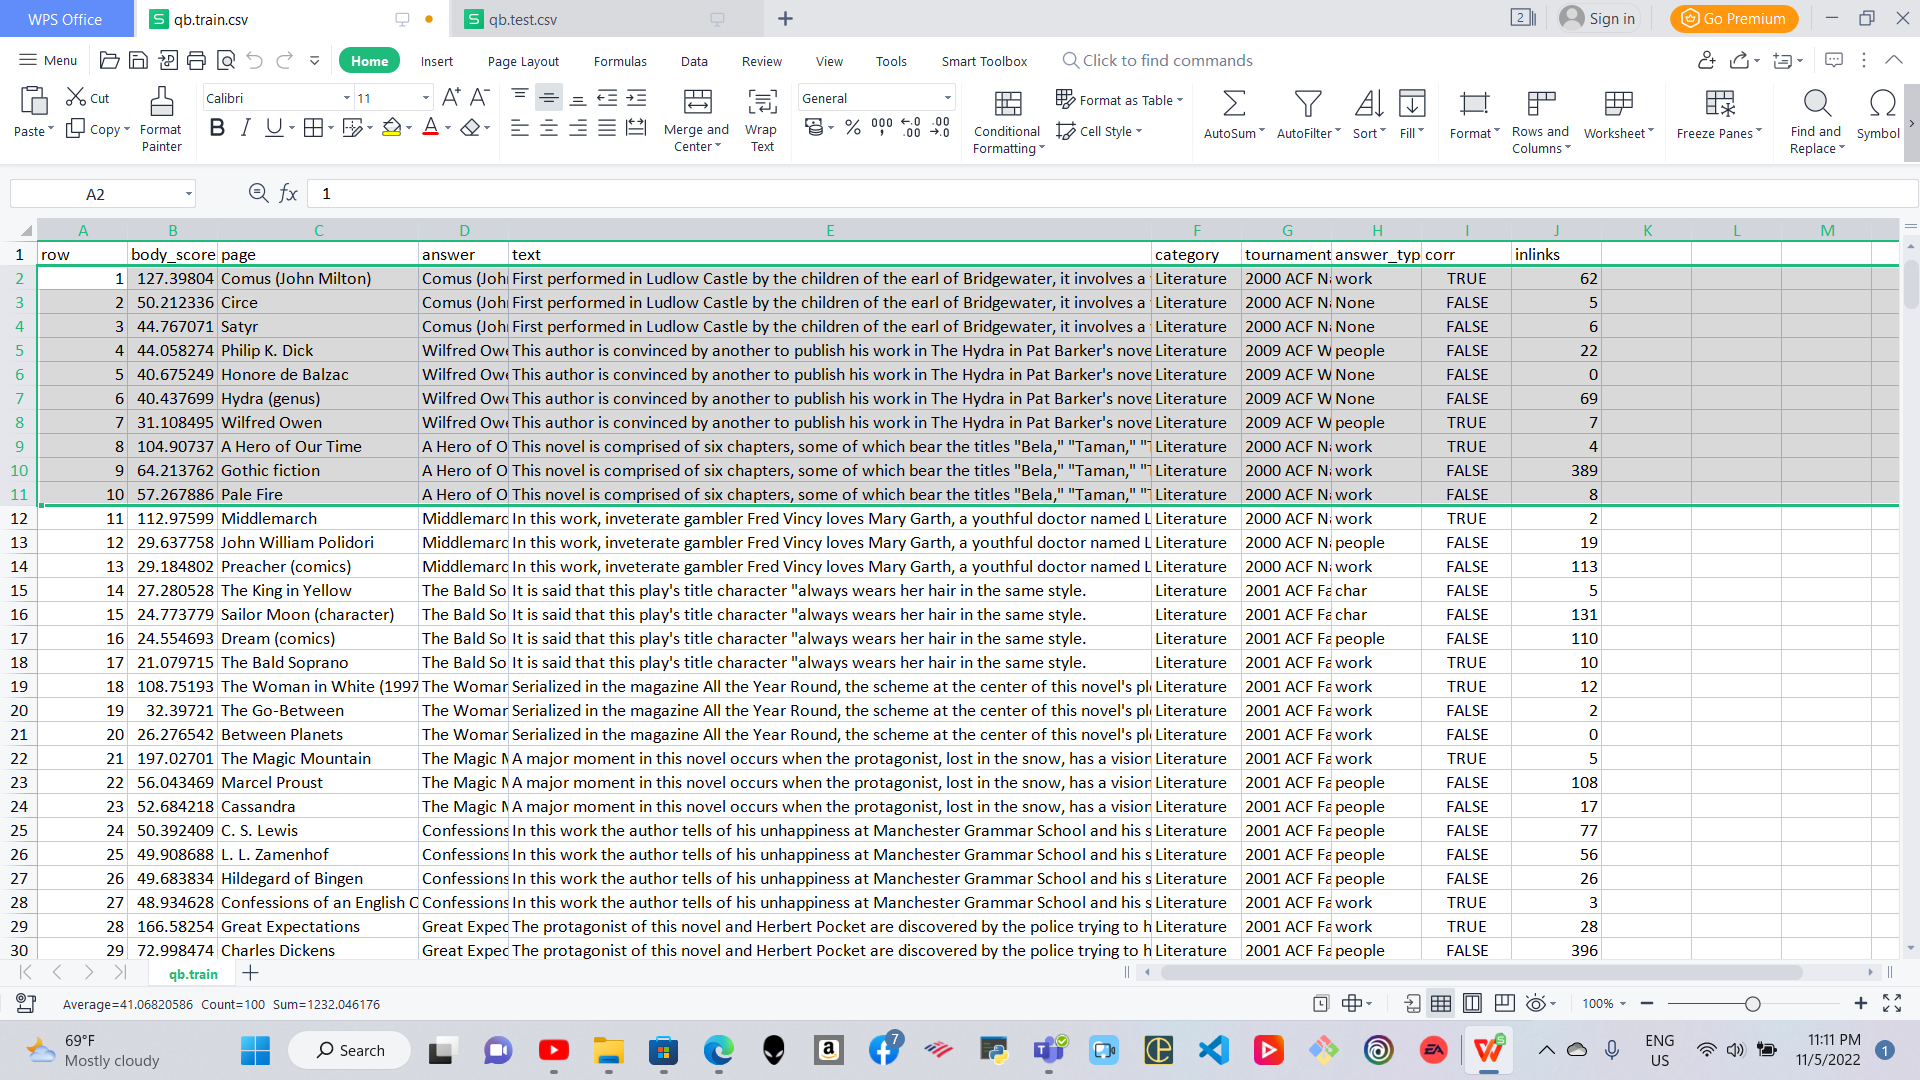

going through the comparison between the predictions 

In [272]:
predictions_dictionary = {'Logistic Regression' : lr_predictions5,  
                           'SVM' : svm_predictions5, 'Decision Tree' : dt_predictions5, 
                           'Actual': y_test5}

predictions_df = pd.DataFrame(predictions_dictionary)
predictions_df.head(50)

,Logistic Regression,SVM,Decision Tree,Actual
6318,1,1,0,1
558,0,0,0,0
3861,0,0,0,1
4705,0,0,0,0
5925,1,1,1,1
5563,0,0,0,0
7398,1,1,1,1
4655,0,0,0,1
7081,0,0,0,1
6337,0,0,0,1


Notice how there more 0s than 1s

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


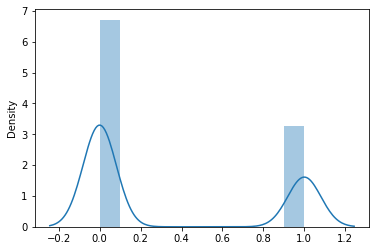

In [273]:
sns.distplot(predictions_df)